In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from bellStates import *

# QIS Project 1
## Michael Seaman
3/6/17

Simulating the output of a CHSH Bell test, with tunable angles.
a 2-qubit Bell state: $ |\Psi^+>=\frac{1}{\sqrt{2}}(|00> + |11>) $

Operator $ \hat{O} $ is composed of $ O_{\theta_{1}} \times O_{\theta_{2}} $

Because we proved the following in HW 4:
$$ P(v_1, v_2) = P(v^\bot_1, v^\bot_2) = \frac{1}{2}\cos^2{(\theta_1 - \theta_2)} $$


$$ P(v^\bot_1, v_2) = P(v_1, v^\bot_2) = \frac{1}{2}\sin^2{(\theta_1 - \theta_2)} $$

We can easily calculate the probabilities of each possible 2-qubit outcome. For example, for $ \frac{\theta_1}{2} - \frac{\theta_2}{2} = \frac{\pi}{4} $, we get the probabilities of |00>, |01>, |10>, and |11> respectively.

In [2]:
print("Probabilites:")
generate_CHSH_pairs(1, theta1=np.pi/4.0, theta2=0, printProbDist=True)

Probabilites:
[ 0.4267767  0.0732233  0.0732233  0.4267767]


array([[1, 1]])

Because of this, we can trivially generate eigenstates for any value of $ \theta $. We become particularly interested in the following ensembles:
$$ A=O_{\theta_1}(0)O_{\theta_2}(\frac{\pi}{4}) \\
B=O_{\theta_1}(0)O_{\theta_2}(\frac{-\pi}{4}) \\
C=O_{\theta_1}(\frac{\pi}{2})O_{\theta_2}(\frac{\pi}{4}) \\
D=O_{\theta_1}(\frac{\pi}{2})O_{\theta_2}(\frac{-\pi}{4}) $$

Generating n = 10000000 of each pair, we can find the average product for each case.

In [3]:
n = int(1e7)
ave_A = np.average(pair_v_to_prod_v(generate_ensemble_A(n, 0)))
ave_B = np.average(pair_v_to_prod_v(generate_ensemble_B(n, 0)))
ave_C = np.average(pair_v_to_prod_v(generate_ensemble_C(n, 0)))
ave_D = np.average(pair_v_to_prod_v(generate_ensemble_D(n, 0)))

print("Average A: %f, Average B: %f, Average C: %f, Average D: %f" % (ave_A, ave_B, ave_C, ave_D))

Average A: 0.706985, Average B: 0.706856, Average C: 0.706969, Average D: -0.706985


And we can see that the sum of these averages according to the CHSH prescription approaches $ 2\sqrt{2} $.

In [4]:
total = ave_A + ave_B + ave_C - ave_D
print("Sum: %f" % (total))
print("2rad2 = %f" % (2*np.sqrt(2)))

Sum: 2.827796
2rad2 = 2.828427


Now, we can shift our angles by $ \phi $ in the ensembles A, B, C, and D s.t.
$$ A=O_{\theta_1}(0)O_{\theta_2}(\frac{\pi}{4} + \phi) \\
B=O_{\theta_1}(0)O_{\theta_2}(\frac{-\pi}{4} + \phi) \\
C=O_{\theta_1}(\frac{\pi}{2})O_{\theta_2}(\frac{\pi}{4} + \phi) \\
D=O_{\theta_1}(\frac{\pi}{2})O_{\theta_2}(\frac{-\pi}{4} + \phi) $$

Let's see the output of this correlator as a function of $ \phi $ in steps of $ \frac{\pi}{16} $:

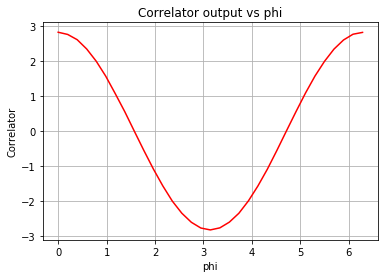

In [14]:
n = int(1e5)
phi_mesh = np.linspace(0, 2*np.pi, 33)

generate_correlator_v = np.vectorize(generate_correlator, excluded=['n'])
corr = generate_correlator_v(n, phi_mesh)

plt.plot(phi_mesh, corr, 'r')
plt.title("Correlator output vs phi")
plt.xlabel("phi")
plt.ylabel("Correlator")
plt.grid(True)
plt.show()

Because the definitions for A, B, C, D, we should be expecting an output graph that resmbles a sine wave, which we do get as shown above.